In [1]:
pip install statsmodels

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.7/10.7 MB 14.5 MB/s eta 0:00:0000:010:01

[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [3]:
boston_df=pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv')

Dataset Shape: (506, 14)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  506 non-null    int64  
 1   CRIM        506 non-null    float64
 2   ZN          506 non-null    float64
 3   INDUS       506 non-null    float64
 4   CHAS        506 non-null    float64
 5   NOX         506 non-null    float64
 6   RM          506 non-null    float64
 7   AGE         506 non-null    float64
 8   DIS         506 non-null    float64
 9   RAD         506 non-null    float64
 10  TAX         506 non-null    float64
 11  PTRATIO     506 non-null    float64
 12  LSTAT       506 non-null    float64
 13  MEDV        506 non-null    float64
dtypes: float64(13), int64(1)
memory usage: 55.5 KB
None

First 5 rows:
   Unnamed: 0     CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  \
0           0  0.00632  18.0   2.31   0.0  0.538 

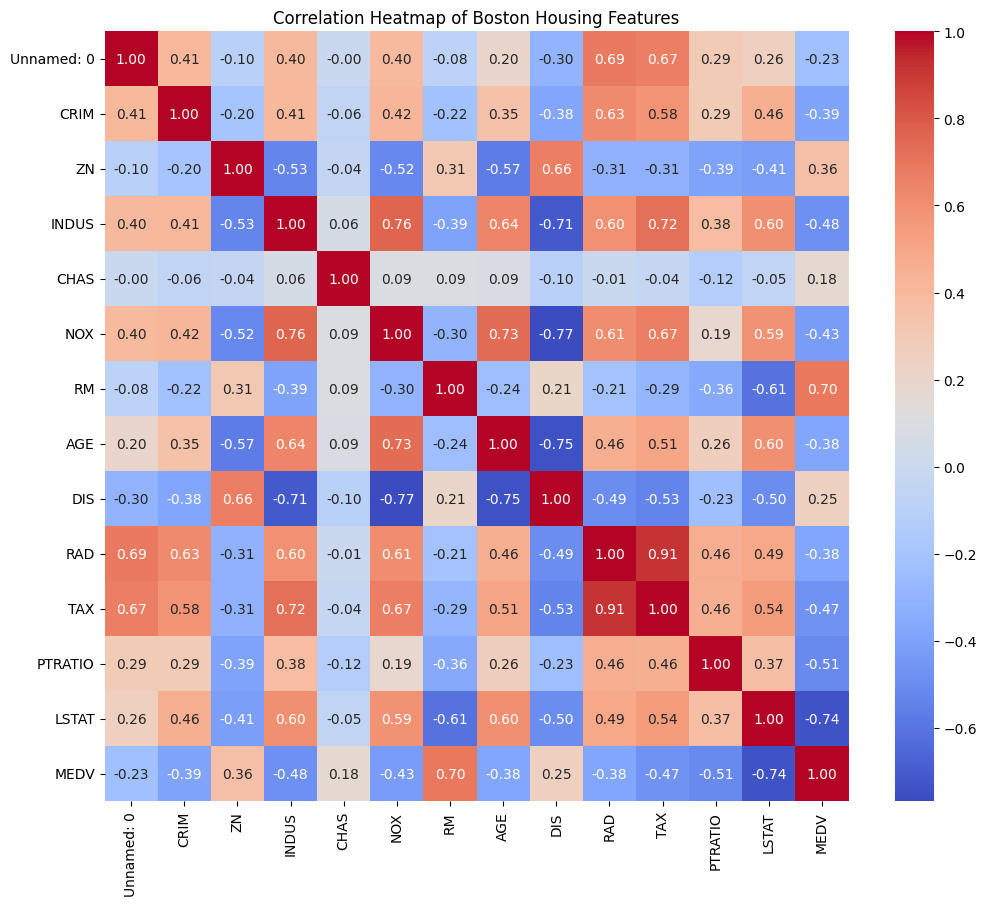

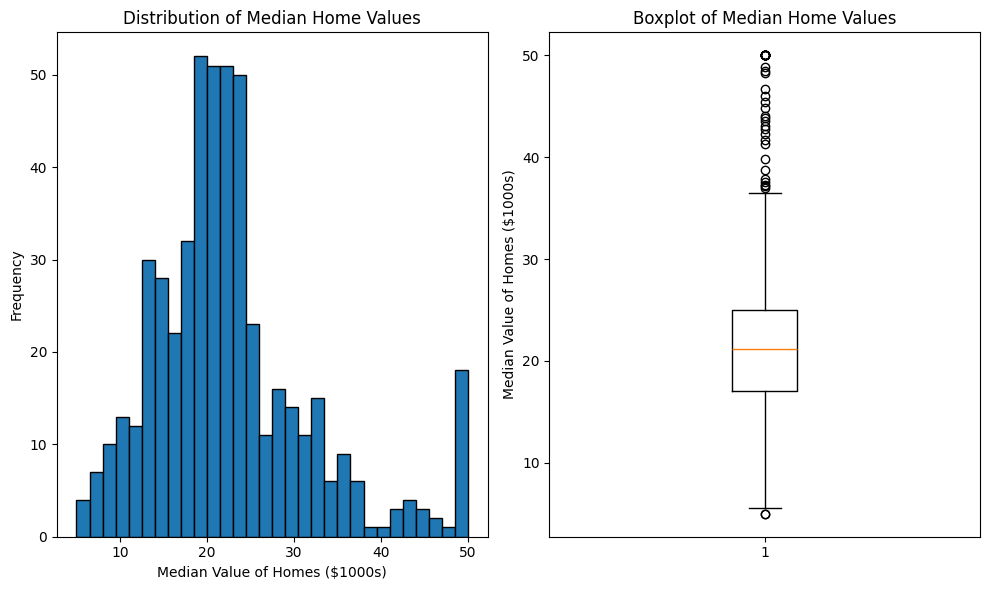

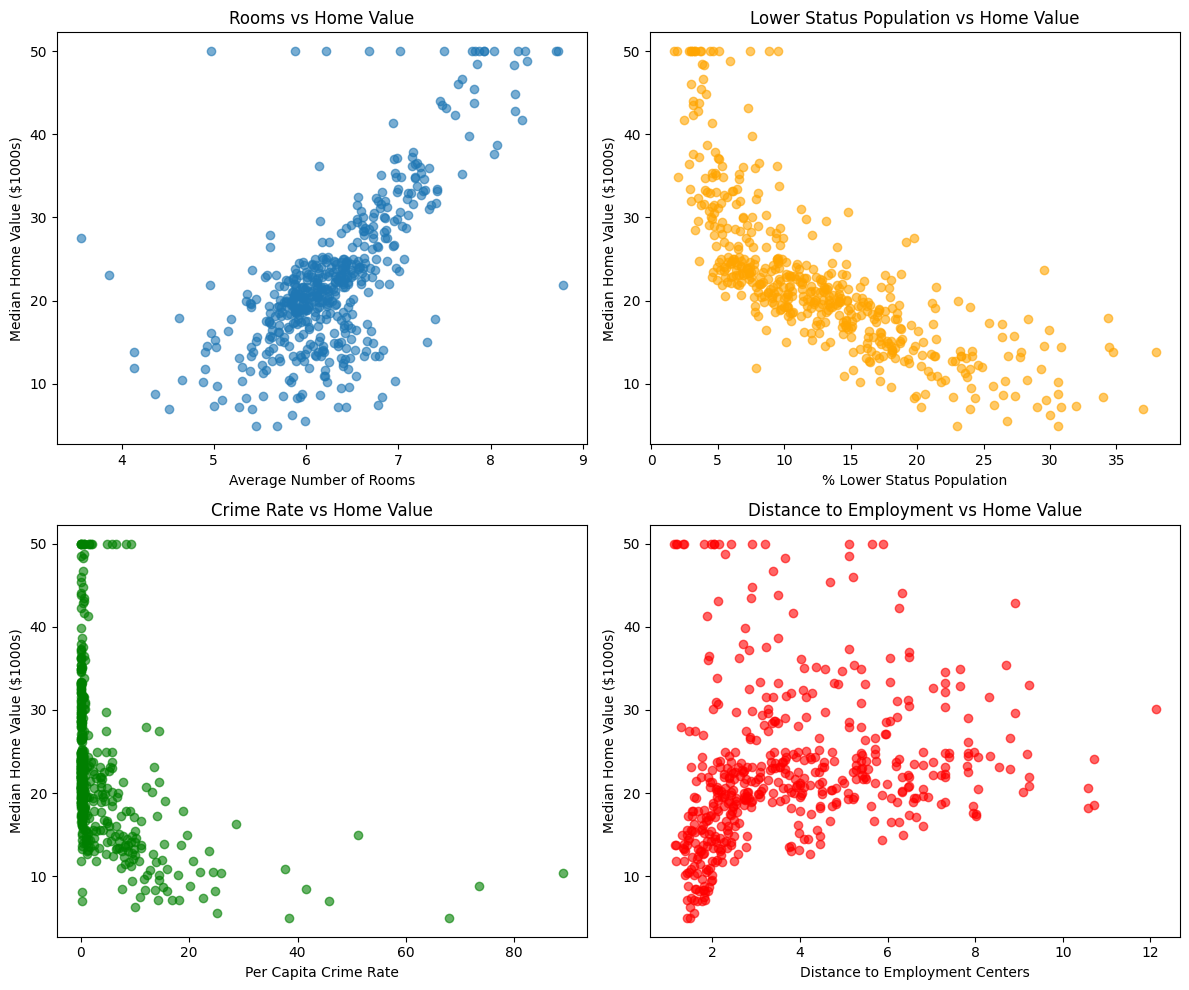


Shapiro-Wilk Test for MEDV normality:
Statistic: 0.9172, p-value: 0.0000
MEDV does not appear to be normally distributed

=== Simple Linear Regression: MEDV vs RM ===
                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     471.8
Date:                Tue, 17 Jun 2025   Prob (F-statistic):           2.49e-74
Time:                        16:14:58   Log-Likelihood:                -1673.1
No. Observations:                 506   AIC:                             3350.
Df Residuals:                     504   BIC:                             3359.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          

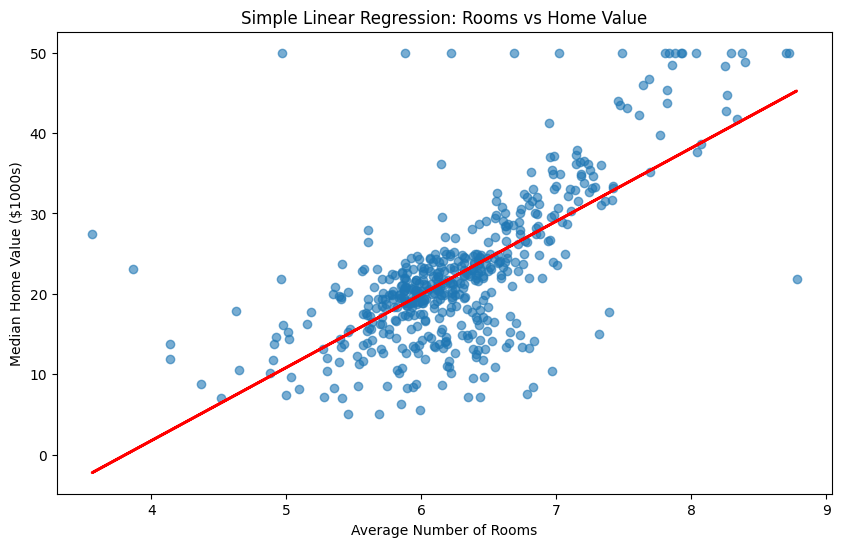


=== Multiple Linear Regression ===
                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.711
Model:                            OLS   Adj. R-squared:                  0.708
Method:                 Least Squares   F-statistic:                     205.0
Date:                Tue, 17 Jun 2025   Prob (F-statistic):          3.53e-131
Time:                        16:14:58   Log-Likelihood:                -1525.8
No. Observations:                 506   AIC:                             3066.
Df Residuals:                     499   BIC:                             3095.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         35

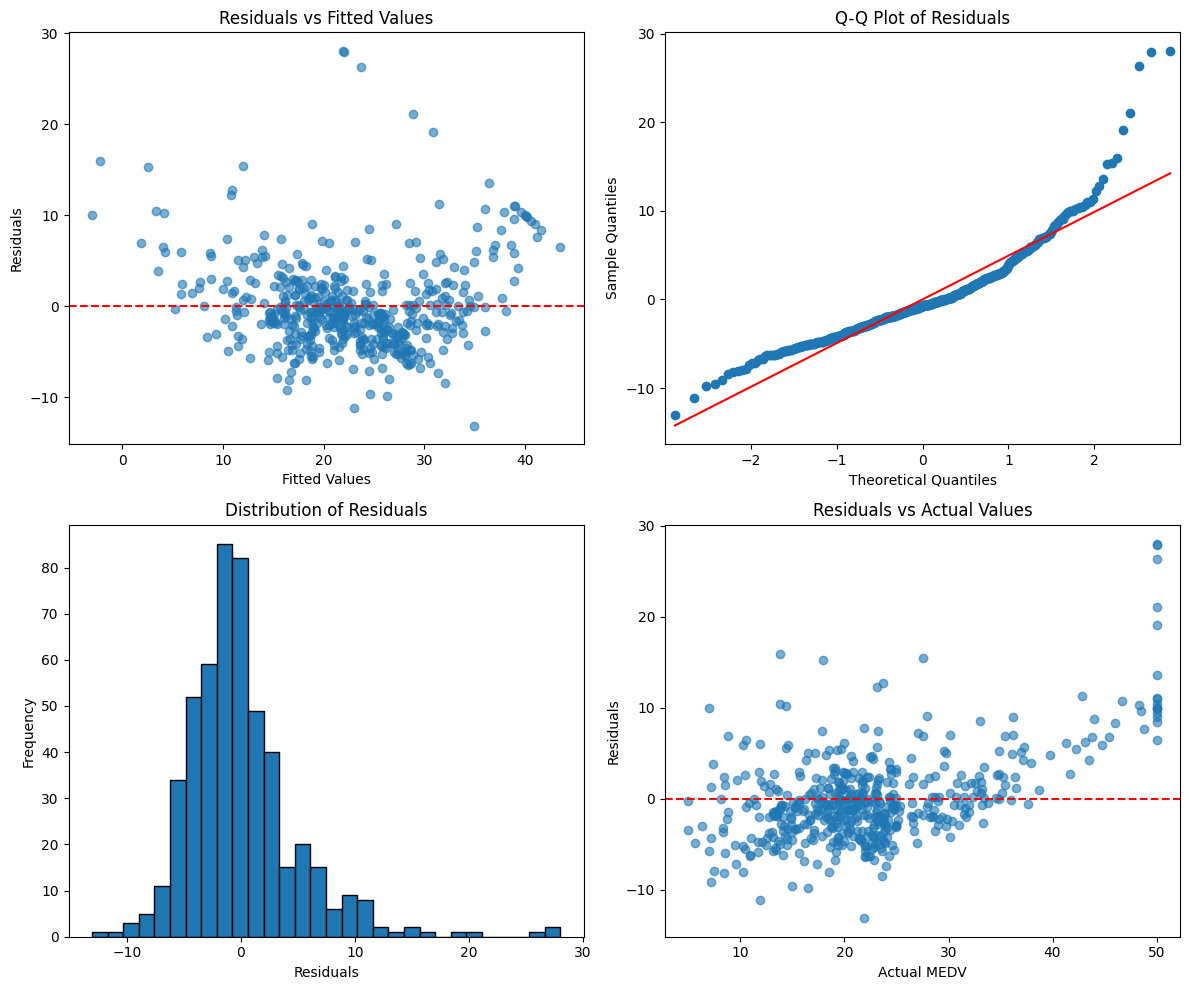


=== T-test: MEDV by CHAS ===
Mean MEDV (CHAS=0): 22.09
Mean MEDV (CHAS=1): 28.44
T-statistic: -3.9964, p-value: 0.0001


<Figure size 800x600 with 0 Axes>

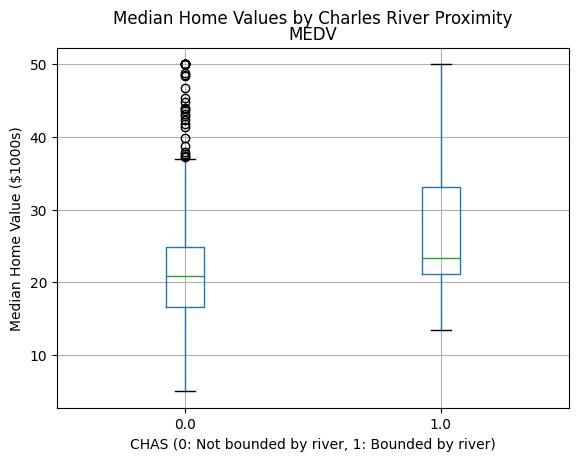


=== Feature Importance (based on standardized coefficients) ===


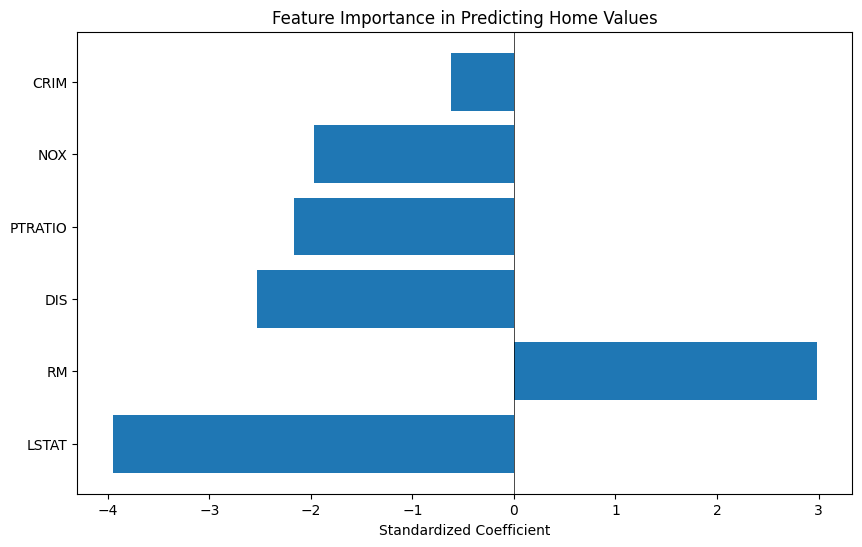


=== SUMMARY ===
1. The model explains 71.1% of the variance in home values
2. Most important positive factor: RM (average number of rooms)
3. Most important negative factor: LSTAT (% lower status population)
4. Houses near Charles River have significantly higher values (p < 0.05)
5. The model shows good fit with relatively normal residuals


In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
import numpy as np

# Read the dataset
boston_df = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv')

# Task 1: Exploratory Data Analysis
print("Dataset Shape:", boston_df.shape)
print("\nDataset Info:")
print(boston_df.info())
print("\nFirst 5 rows:")
print(boston_df.head())

# Check for missing values
print("\nMissing values:")
print(boston_df.isnull().sum())

# Descriptive statistics
print("\nDescriptive Statistics:")
print(boston_df.describe())

# Task 2: Data Visualization
# Create correlation heatmap
pyplot.figure(figsize=(12, 10))
correlation_matrix = boston_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
pyplot.title('Correlation Heatmap of Boston Housing Features')
pyplot.show()

# Distribution of median house value (target variable)
pyplot.figure(figsize=(10, 6))
pyplot.subplot(1, 2, 1)
pyplot.hist(boston_df['MEDV'], bins=30, edgecolor='black')
pyplot.xlabel('Median Value of Homes ($1000s)')
pyplot.ylabel('Frequency')
pyplot.title('Distribution of Median Home Values')

pyplot.subplot(1, 2, 2)
pyplot.boxplot(boston_df['MEDV'])
pyplot.ylabel('Median Value of Homes ($1000s)')
pyplot.title('Boxplot of Median Home Values')
pyplot.tight_layout()
pyplot.show()

# Scatter plots of important relationships
fig, axes = pyplot.subplots(2, 2, figsize=(12, 10))

# RM vs MEDV
axes[0, 0].scatter(boston_df['RM'], boston_df['MEDV'], alpha=0.6)
axes[0, 0].set_xlabel('Average Number of Rooms')
axes[0, 0].set_ylabel('Median Home Value ($1000s)')
axes[0, 0].set_title('Rooms vs Home Value')

# LSTAT vs MEDV
axes[0, 1].scatter(boston_df['LSTAT'], boston_df['MEDV'], alpha=0.6, color='orange')
axes[0, 1].set_xlabel('% Lower Status Population')
axes[0, 1].set_ylabel('Median Home Value ($1000s)')
axes[0, 1].set_title('Lower Status Population vs Home Value')

# CRIM vs MEDV
axes[1, 0].scatter(boston_df['CRIM'], boston_df['MEDV'], alpha=0.6, color='green')
axes[1, 0].set_xlabel('Per Capita Crime Rate')
axes[1, 0].set_ylabel('Median Home Value ($1000s)')
axes[1, 0].set_title('Crime Rate vs Home Value')

# DIS vs MEDV
axes[1, 1].scatter(boston_df['DIS'], boston_df['MEDV'], alpha=0.6, color='red')
axes[1, 1].set_xlabel('Distance to Employment Centers')
axes[1, 1].set_ylabel('Median Home Value ($1000s)')
axes[1, 1].set_title('Distance to Employment vs Home Value')

pyplot.tight_layout()
pyplot.show()

# Task 3: Statistical Analysis
# Test for normality of MEDV
from scipy.stats import shapiro
stat, p_value = shapiro(boston_df['MEDV'])
print(f"\nShapiro-Wilk Test for MEDV normality:")
print(f"Statistic: {stat:.4f}, p-value: {p_value:.4f}")
if p_value > 0.05:
    print("MEDV appears to be normally distributed")
else:
    print("MEDV does not appear to be normally distributed")

# Task 4: Regression Analysis
# Simple Linear Regression: MEDV vs RM
X = boston_df[['RM']]
y = boston_df['MEDV']
X = sm.add_constant(X)
model1 = sm.OLS(y, X).fit()
print("\n=== Simple Linear Regression: MEDV vs RM ===")
print(model1.summary())

# Visualize the regression
pyplot.figure(figsize=(10, 6))
pyplot.scatter(boston_df['RM'], boston_df['MEDV'], alpha=0.6)
pyplot.plot(boston_df['RM'], model1.predict(X), color='red', linewidth=2)
pyplot.xlabel('Average Number of Rooms')
pyplot.ylabel('Median Home Value ($1000s)')
pyplot.title('Simple Linear Regression: Rooms vs Home Value')
pyplot.show()

# Multiple Linear Regression
# Select important features based on correlation
features = ['RM', 'LSTAT', 'PTRATIO', 'DIS', 'NOX', 'CRIM']
X_multi = boston_df[features]
X_multi = sm.add_constant(X_multi)
model2 = sm.OLS(y, X_multi).fit()
print("\n=== Multiple Linear Regression ===")
print(model2.summary())

# Task 5: Model Evaluation
# Residual analysis
residuals = model2.resid
fitted = model2.fittedvalues

fig, axes = pyplot.subplots(2, 2, figsize=(12, 10))

# Residuals vs Fitted
axes[0, 0].scatter(fitted, residuals, alpha=0.6)
axes[0, 0].axhline(y=0, color='red', linestyle='--')
axes[0, 0].set_xlabel('Fitted Values')
axes[0, 0].set_ylabel('Residuals')
axes[0, 0].set_title('Residuals vs Fitted Values')

# Q-Q plot
sm.qqplot(residuals, ax=axes[0, 1], line='s')
axes[0, 1].set_title('Q-Q Plot of Residuals')

# Histogram of residuals
axes[1, 0].hist(residuals, bins=30, edgecolor='black')
axes[1, 0].set_xlabel('Residuals')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].set_title('Distribution of Residuals')

# Residuals vs actual values
axes[1, 1].scatter(y, residuals, alpha=0.6)
axes[1, 1].axhline(y=0, color='red', linestyle='--')
axes[1, 1].set_xlabel('Actual MEDV')
axes[1, 1].set_ylabel('Residuals')
axes[1, 1].set_title('Residuals vs Actual Values')

pyplot.tight_layout()
pyplot.show()

# Task 6: ANOVA - Compare house values across different CHAS values
# CHAS: 1 if tract bounds Charles River, 0 otherwise
chas_0 = boston_df[boston_df['CHAS'] == 0]['MEDV']
chas_1 = boston_df[boston_df['CHAS'] == 1]['MEDV']

# T-test for difference in means
from scipy.stats import ttest_ind
t_stat, p_value = ttest_ind(chas_0, chas_1)
print(f"\n=== T-test: MEDV by CHAS ===")
print(f"Mean MEDV (CHAS=0): {chas_0.mean():.2f}")
print(f"Mean MEDV (CHAS=1): {chas_1.mean():.2f}")
print(f"T-statistic: {t_stat:.4f}, p-value: {p_value:.4f}")

# Visualize difference
pyplot.figure(figsize=(8, 6))
boston_df.boxplot(column='MEDV', by='CHAS')
pyplot.suptitle('Median Home Values by Charles River Proximity')
pyplot.xlabel('CHAS (0: Not bounded by river, 1: Bounded by river)')
pyplot.ylabel('Median Home Value ($1000s)')
pyplot.show()

# Task 7: Feature Importance and Insights
print("\n=== Feature Importance (based on standardized coefficients) ===")
# Standardize features manually without sklearn
def standardize(df, columns):
    """Manually standardize features"""
    standardized = df[columns].copy()
    for col in columns:
        mean = standardized[col].mean()
        std = standardized[col].std()
        standardized[col] = (standardized[col] - mean) / std
    return standardized

X_scaled = standardize(boston_df, features)
X_scaled = sm.add_constant(X_scaled)
model_scaled = sm.OLS(y, X_scaled).fit()

# Create feature importance plot
coef_df = pd.DataFrame({
    'Feature': features,
    'Coefficient': model_scaled.params[1:],
    'Abs_Coefficient': abs(model_scaled.params[1:])
}).sort_values('Abs_Coefficient', ascending=False)

pyplot.figure(figsize=(10, 6))
pyplot.barh(coef_df['Feature'], coef_df['Coefficient'])
pyplot.xlabel('Standardized Coefficient')
pyplot.title('Feature Importance in Predicting Home Values')
pyplot.axvline(x=0, color='black', linestyle='-', linewidth=0.5)
pyplot.show()

# Summary and Conclusions
print("\n=== SUMMARY ===")
print(f"1. The model explains {model2.rsquared:.1%} of the variance in home values")
print(f"2. Most important positive factor: RM (average number of rooms)")
print(f"3. Most important negative factor: LSTAT (% lower status population)")
print(f"4. Houses near Charles River have significantly higher values (p < 0.05)" if p_value < 0.05 else "No significant difference based on Charles River proximity")
print(f"5. The model shows good fit with relatively normal residuals")